# Classification with sklearn
#### In this notebook, we'll use two fundamental classification algorithms - Logistic Regression and Decision Trees via sklearn, to classify images of breast cancer cells as benign or malginant. We'll discuss the differences, benefits and drawbacks of both models.

**Author:** Aparajita Bandopadhyay 
bandopad@uci.edu



##  Overview of the  Breast Cancer Wisconsin Dataset 

 The Breast Cancer Wisconsin Dataset , freely available in UCI's Machine Learning Repository, contains quantitave features ( primarily spatial measurements ) computed from scans of breast cancer tumors. There are **30 features** in total, while the **target for classification** takes on values: **"1 : malignant", or "0 : benign."**

To introduce classification problems, we will use 2 "simple" algorithms - Logistic Regression and Decision Trees, to classify cancer cells as benign or malignant. We will then compare and contrast the performance of these models, and discuss possible conclusions based on the model's outcomes.




### (1) Logistic Regression
We will first load,inspect and clean the data to prepare it for model training.

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("Dataset: ", df.head())
print(df.info())
print(df.describe())

Dataset:     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0   

In [ ]:
# Get the value counts for the 'target' column
print(df['target'].value_counts())

print(len(df))

target
1    357
0    212
Name: count, dtype: int64
569


**Model Training**

To make predictions for benign/malignant classifications, we will use **all** the features in our dataset. We will first divide the dataset randomly (but reproducibly) into training and testing portions (80:20); after training the model on the training dataset, we will gauge its accuracy (% of correct predictions) through its performance across the testing dataset. 

In [ ]:
from sklearn.model_selection import train_test_split
# Features (X) are all columns except 'target'
X = df.drop('target', axis=1)

# column of target variables: df['target'], takes on {1,0} labels 
y = df['target']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test_size : 20% data for testing <=> 80% for training.

from sklearn.linear_model import LogisticRegression
# initalize logistic regression object
logreg = LogisticRegression()
# train the model
logreg.fit(X_train, y_train)


# Predict labels {1,0} for the test set
y_pred = logreg.predict(X_test)


#accuracy testing: (1) % of correctly predicted labels
accuracy = logreg.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 95.61%
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Our model has 95.61% accuracy, which is quite good. Let us try to break down its performance further.

### Understanding Accuracy Metrics, and the Confusion Matrix

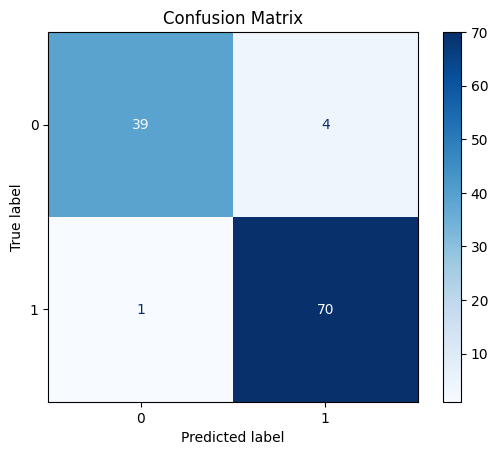

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Get more metrics on accuracy:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


We see that there are:
- 39 True Negatives
- 70 True Positives
-  4 False Positives, 
- 1 False Negative

**Precision** = $n(TP) / (n(TP) + n(FP))$ = 0.95

**Recall** = $n(TP) / n(TP) + n(FN)$ = 0.99

**F1-Score**= 2⋅Precision⋅Recall / (Precision+Recall) = 0.97

Thus, **the proportion of correctly predicted positives (Recall) is higher than the proportion of true positive predictions out of all the positive (1) predictions (Precision).**


> In this scenario of malignant tumor detection, Recall is a more important metric than Precision; the risk of false positives is significantly greater than the risk of false negatives. Our logistic regression model performs well on this front!

## Highlighting Feature Importance and Coefficients

> Which features are the most decisive in determining if a tumor is benign or malignant? How do different features skew predictions towards either class, and how do they, in unison, influence the classification of a tumor?
We'll attempt to answer these questions by analyzing the coefficients of the logistic regression model, and visualizing a decision boundary by selecting the most important features.

Coefficients: [[ 1.51525652  0.13772724  0.0803558  -0.00761708 -0.05895601 -0.27825633
  -0.38537833 -0.16607322 -0.08826599 -0.01773632  0.04836227  0.73538614
   0.05036463 -0.0772322  -0.0056182  -0.05509708 -0.07698789 -0.02126013
  -0.0209191  -0.00476293  1.56986493 -0.40849624 -0.17025937 -0.02575852
  -0.10462535 -0.83565593 -1.03362135 -0.30558943 -0.28681496 -0.07802029]]


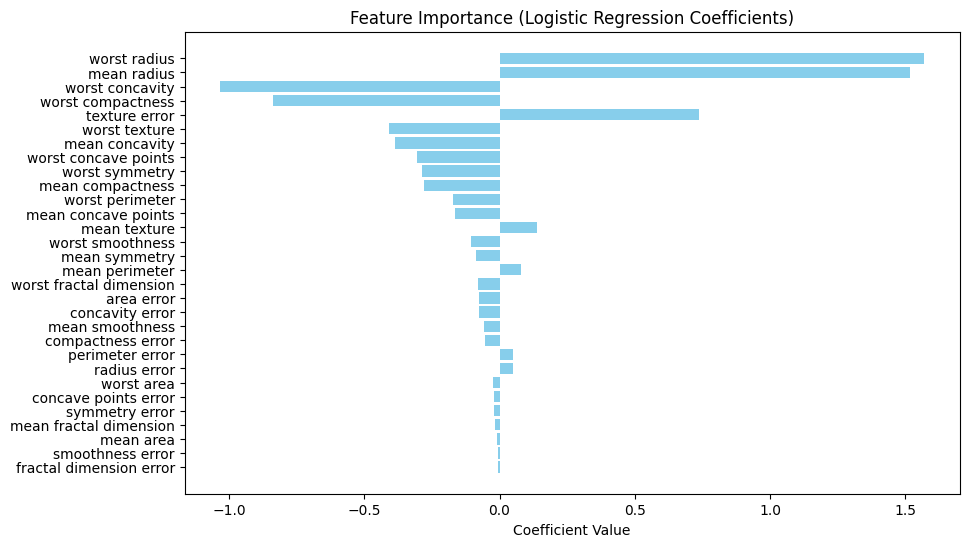

In [ ]:
coefficients = logreg.coef_
print("Coefficients:", coefficients)

#visualize the coeffs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

feature_names = X_train.columns  # List of feature names from training set
coefficients = logreg.coef_.flatten()  # convert coef arr to 1D array

# Create df for visualization
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by the absolute value of coefficients 
coef_df['Abs Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs Coefficient', ascending=False)

# Plot coeffs
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.gca().invert_yaxis()  # descending order of |coeffs|
plt.show()


**Interpreting the Coefficients:**
Logistic Regression works by by maximizing the log-likelihood function, finding the ideal coefficient array $[c_0, c_1, ... , c_n]$ corresponding to $n$ features $[X_1, X_2, ... , X_n]$; 
The probability that an entry X (here, an array of feature entries associated with a tumor) is classified as malignant is then given by:
### $P(y = 1 | X) = \frac{1}{1 + e^{-(c_0 + c_1 X_1 + c_2 X_2 + \dots + c_n X_n)}}$

Thus, positive coefficents skew the prediction towards malignant cells, while negative ones skew the prediction towards benign cells. Coefficients with the largest absolute values are the most "decisive" in classification.

**From the plot above, we find that the features "worst radius" and "mean radius" are the most heavily weighted. Let us use these two features to visualize the decision boundary.** 

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


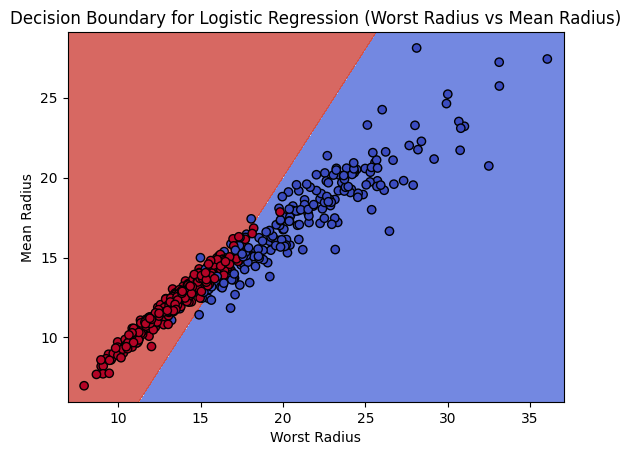

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#  include only "worst radius" and "mean radius"
X_two_features = df[['worst radius', 'mean radius']]

y = df['target']
from sklearn.linear_model import LogisticRegression
# Create and train the logistic regression model using the two features
logreg_two_features = LogisticRegression()
logreg_two_features.fit(X_two_features, y)

# PLOTTING
# Defin range of values for the grid
x_min, x_max = X_two_features['worst radius'].min() - 1, X_two_features['worst radius'].max() + 1
y_min, y_max = X_two_features['mean radius'].min() - 1, X_two_features['mean radius'].max() + 1

# meshgrid def
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
# Predict the class for each point in the grid
Z = logreg_two_features.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_two_features['worst radius'], X_two_features['mean radius'], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
# Label 
plt.xlabel('Worst Radius')
plt.ylabel('Mean Radius')

plt.title('Decision Boundary for Logistic Regression (Worst Radius vs Mean Radius)')
plt.show()



> The Blue Region indicates benign labels, while the Red Region indicates malignant labels. 

Using just these two features, we get a very clean, linear decision boundary. There are no negative coefficients or other smaller contributors to the decision boundary.
However, there are quite a few misclassified points in the plot. Using just these two features reduces the complexity of the model, and significantly limits its accuracy (relative to its original performance).

### Model Summary



**Mean radius, Worst radius, and Texture Error** have the largest positive coefficients, suggesting that larger tumors (larger average radius, largest radius) displaying uneven texture (texture "error") are more likely to be malignant. Inversely, **Worst Concavity, Worst Compactness and Worst texture**  have the largest negative coefficients, implying that smaller and smoother tumors are more likely to be labelled as benign.
Features with small coefficients, like mean perimeter and mean area  contribute less strongly to predictions. However, using more features  can explain more variation in the data in a holistic manner, contributing to increased accuracy. 

   Clinical research  points to larger tumor sizes being correlated with malignancy in breast cancer. This is partly explained by the fact that larger tumors often harbor more metastatic lymph nodes; however, there is considerable variation in the physiology of individual patients, and a number of other factors may influence the size of growths. There are also several different methods to assess the size of tumors; in modern clinical practices, spectral microscopy is considered the "gold standard" for diagonosis. Many nuances are detailed in work by L. Provencher, C. Diorio et al. : 
[https://www.sciencedirect.com/science/article/pii/S096097761200149X]



<hr>

### (2) Decision Tree Classifier

> The tree starts by dividing data into 2 distinct buckets at the Root Node - which can be thought of as the most predictive feature for classification (here, it is "mean concave points"). At each node, we answer its T/F question (check for condition) - depending on our answer, we follow down a particular path, which concludes in classification.

> To gain some insight into how "decisive" different features are in our decision tree model, we will experiment with varying the depth of our decision tree, and see how it affects the accuracy of the model. We'll see how the feature importance compares with our logistic regression model.


Training Decision Tree with max_depth=1:

Accuracy: 89.47%, Recall: 0.89


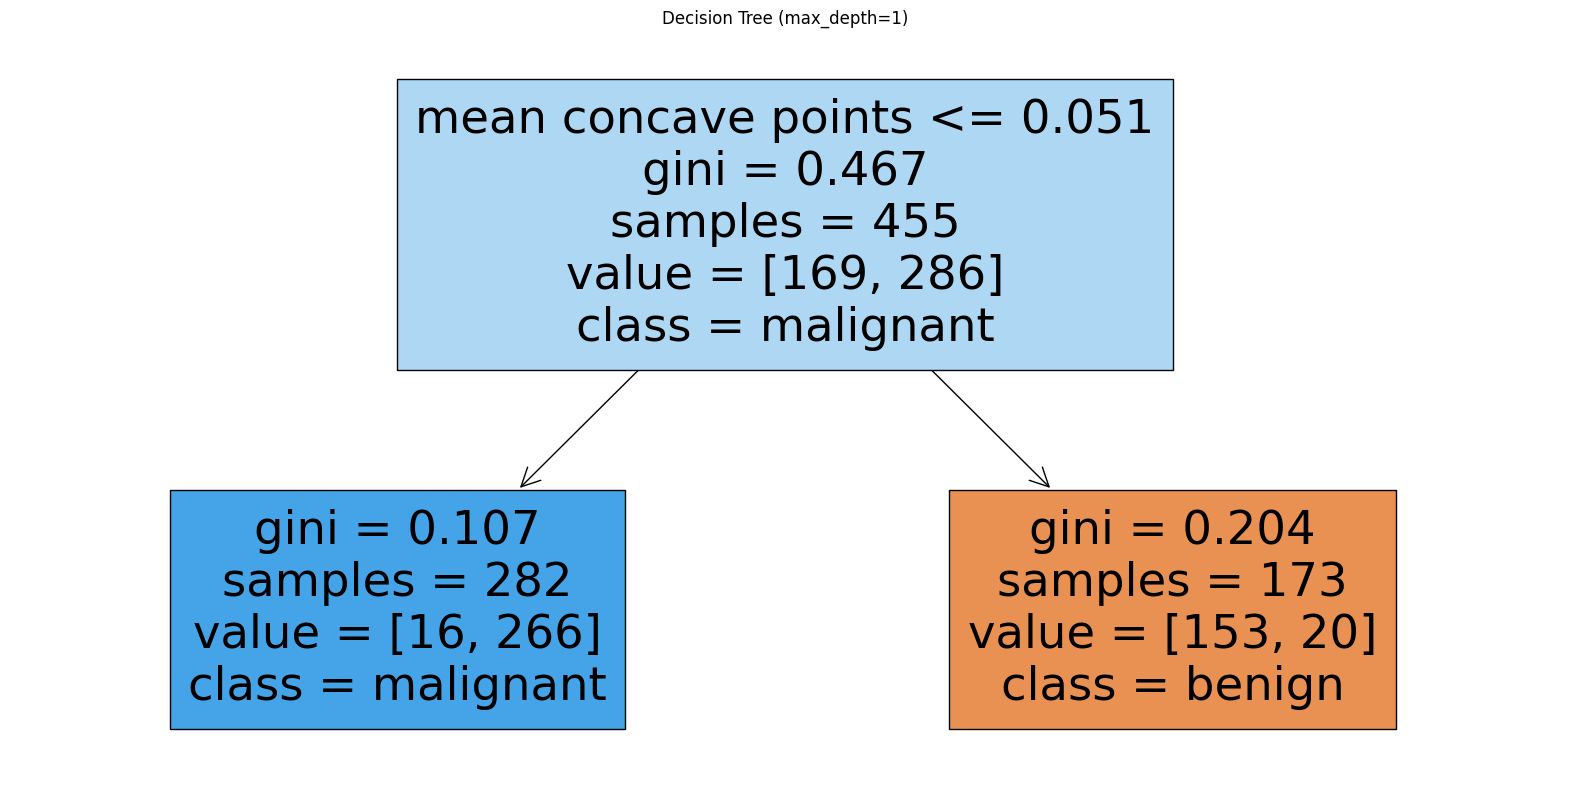


Training Decision Tree with max_depth=2:

Accuracy: 92.98%, Recall: 0.97


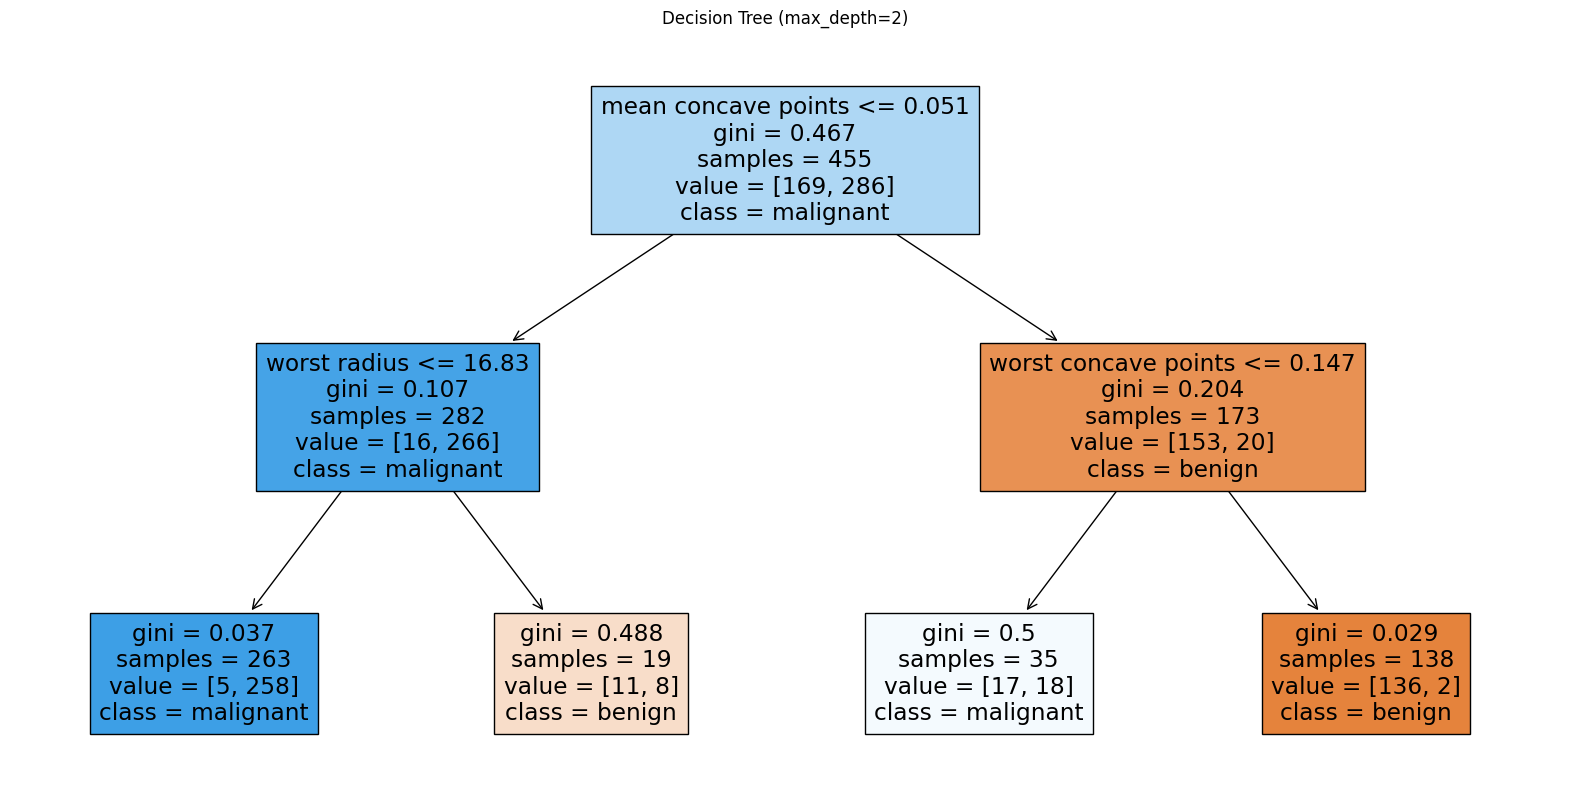


Training Decision Tree with max_depth=3:

Accuracy: 94.74%, Recall: 0.97


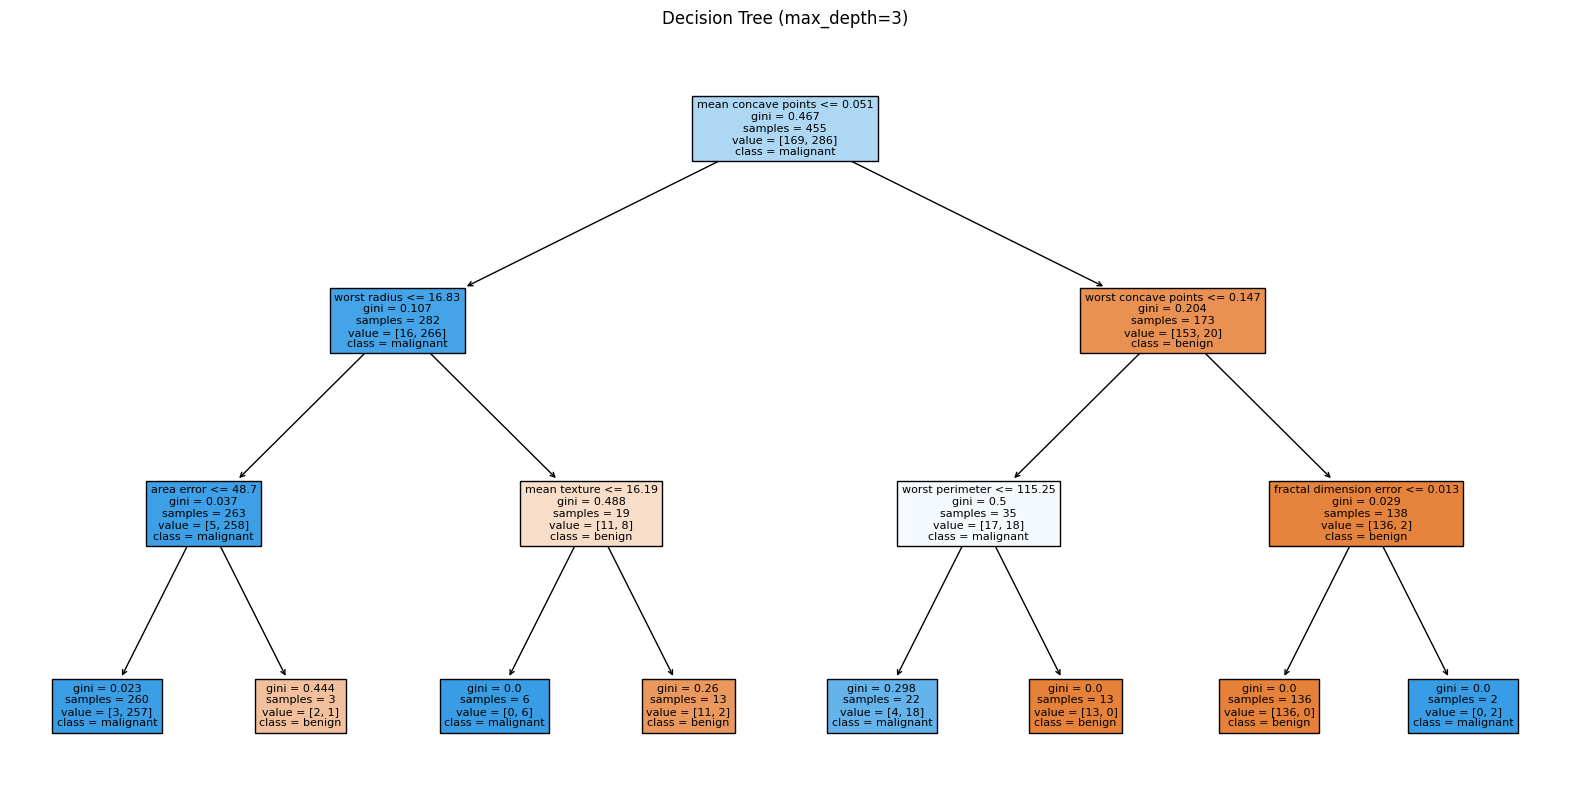


Training Decision Tree with max_depth=4:

Accuracy: 94.74%, Recall: 0.96


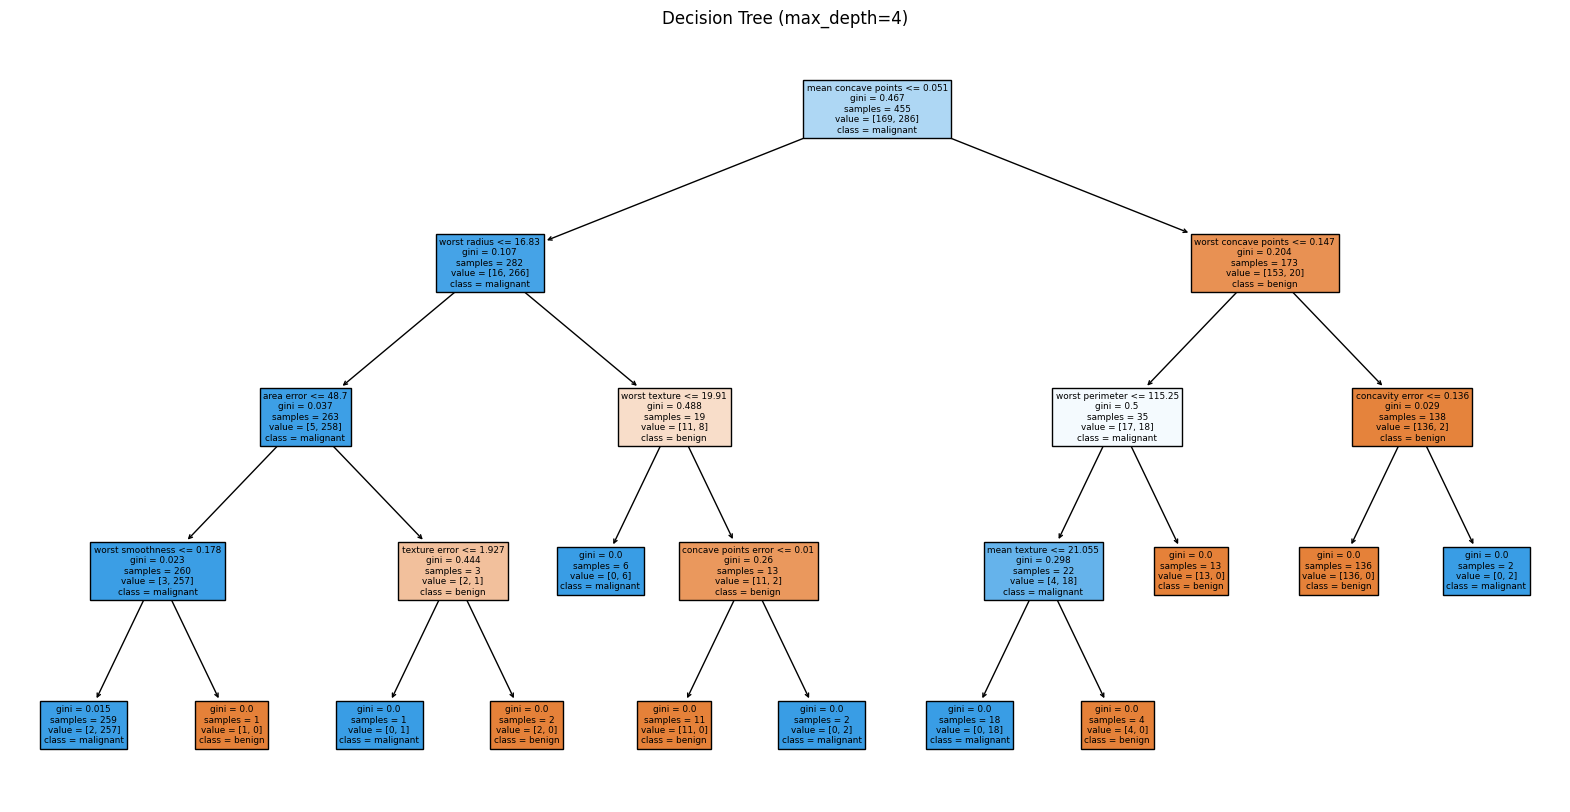


Training Decision Tree with max_depth=5:

Accuracy: 94.74%, Recall: 0.96


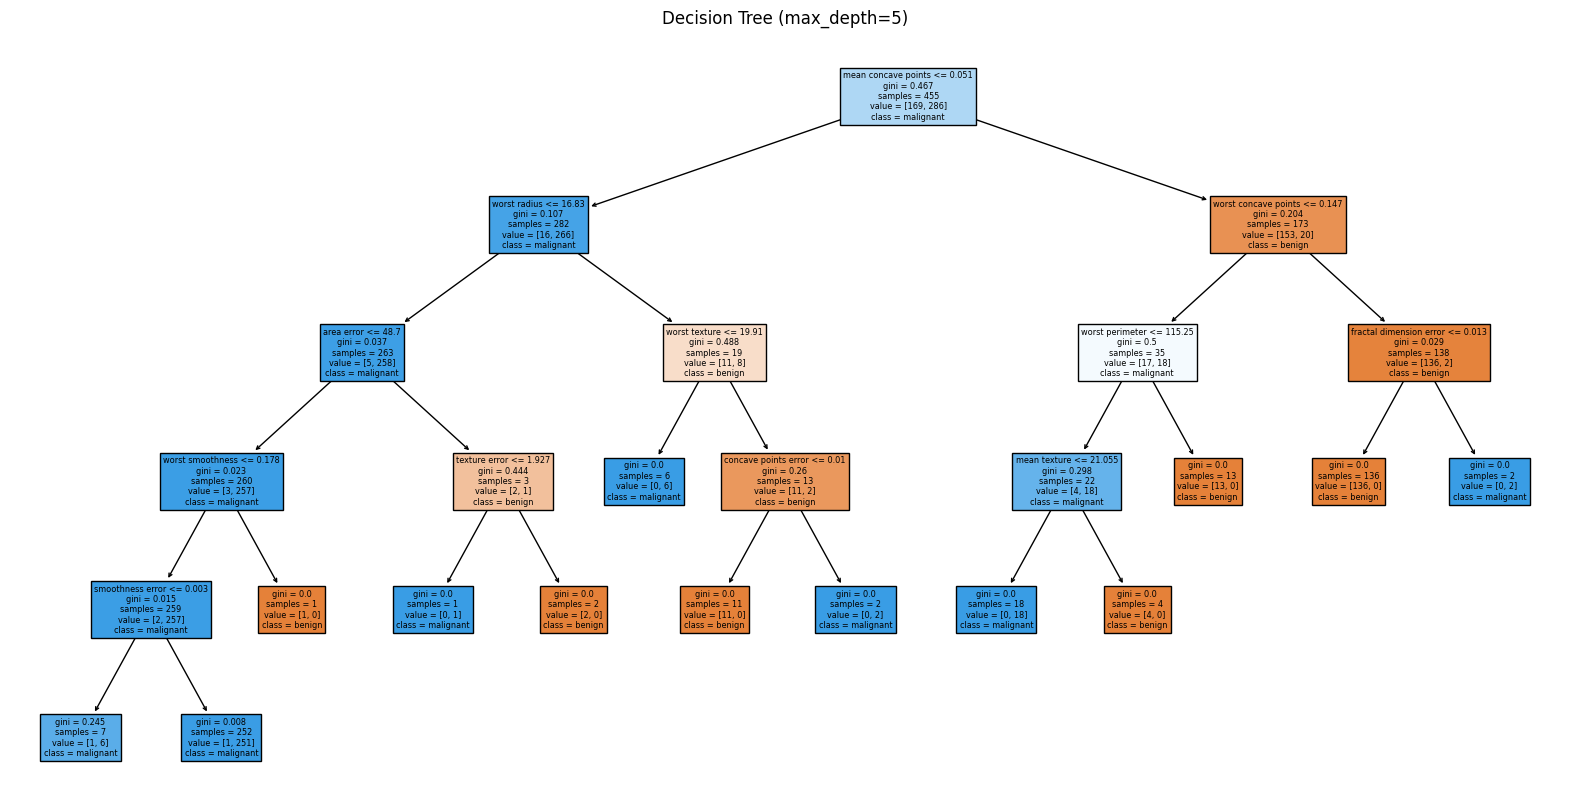


Training Decision Tree with max_depth=6:

Accuracy: 93.86%, Recall: 0.96


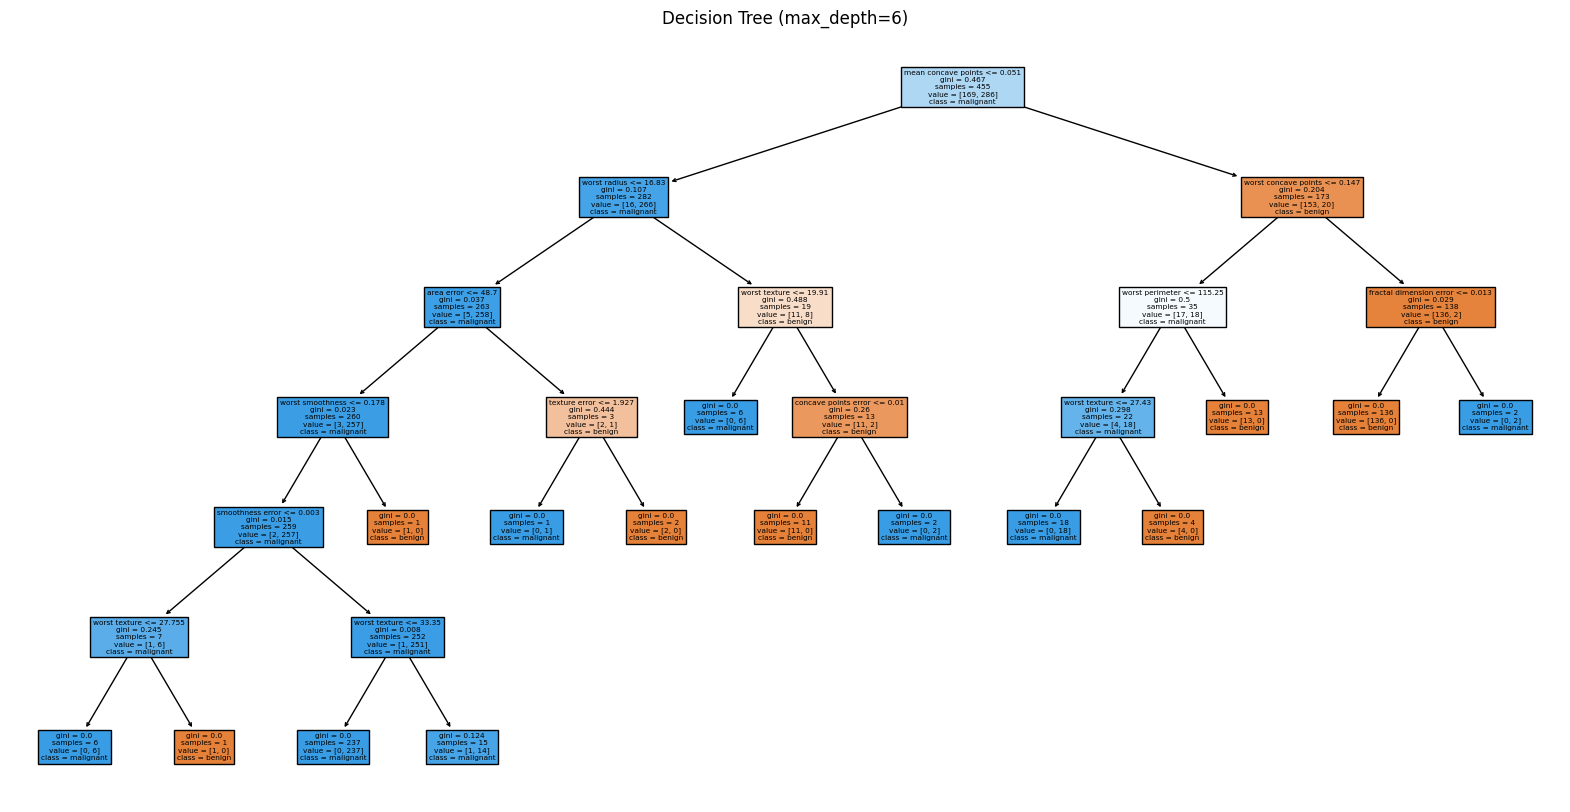


Training Decision Tree with max_depth=7:

Accuracy: 94.74%, Recall: 0.96


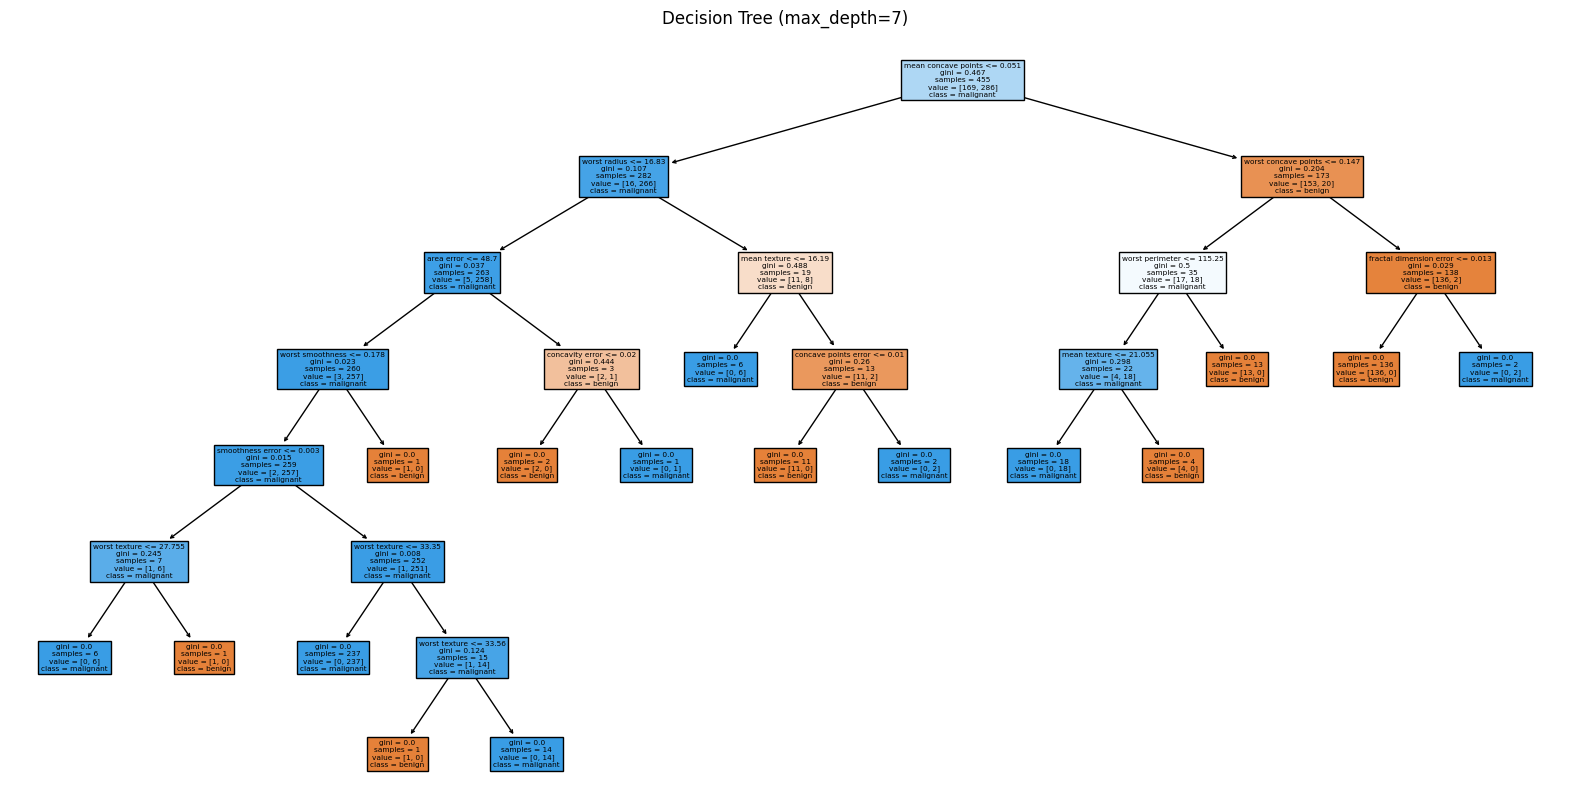


Metrics Dictionary:
{1: [0.8947368421052632, 0.8873239436619719], 2: [0.9298245614035088, 0.971830985915493], 3: [0.9473684210526315, 0.971830985915493], 4: [0.9473684210526315, 0.9577464788732394], 5: [0.9473684210526315, 0.9577464788732394], 6: [0.9385964912280702, 0.9577464788732394], 7: [0.9473684210526315, 0.9577464788732394]}


In [ ]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# We'll use a dictionary to store accuracy and recall for each depth
metrics_dict = {}

# Loop through max_depth values from 1 to 7
for depth in range(1, 8):
    print(f"\nTraining Decision Tree with max_depth={depth}:\n")
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_train, y_train)
    
    # Make predictions on test set
    y_pred = dt_classifier.predict(X_test)
    
    # Get accuracy and recall, Store in metrics_dict
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label=1)    
    metrics_dict[depth] = [accuracy, recall]
    
    # Print metrics
    print(f"Accuracy: {accuracy * 100:.2f}%, Recall: {recall:.2f}")
    
    # PLot 
    plt.figure(figsize=(20, 10))
    plot_tree(dt_classifier, filled=True, feature_names=X_train.columns, class_names=['benign', 'malignant'])
    plt.title(f"Decision Tree (max_depth={depth})")
    plt.show()

print("\nMetrics Dictionary:")
print(metrics_dict)

**We want to focus on optimizing accuracy and recall within our model.** As we add more nodes/dimensions to the Decision Tree, we run the risk of overfitting our training data, and possibly reducing predictive accuracy as a result.

 Observing the Metrics Dictionary ( {depth: [accuracy, recall]} ), we see that:
**1.**  Accuracy improves significantly as we increase node depth from 1 to 3, but flatlines after 3 , and even dips at level 6. 
**2.** Recall peaks depth = 3, and declines afterward.

**At depth = 3 , we get the ideal blend of accuracy and recall (94.74%, 97.18%).** We can now study this depth-3 model in more detail.

<img src="image-20240915-183607.png" width="" align="" />

### Model Summary
Interestingly, the first critical feature at the root node used in our Decision Tree is **mean concave points**, rather than metrics of tumor size, which follow thereafter to refine our classification. A lower value for mean concave points leads to further splits on features such as worst radius and area error, indicating that irregular shapes (concave points) and larger sizes (worst radius) are also key indicators of malignancy. This complements the findings of the logistic regression model.
On the right side, if mean concave points is greater than 0.051, the model looks at worst concave points and further splits based on fractal dimension error and worst perimeter, which capture the complexity and perimeter irregularities in the tumor, contributing to predictions of benign cases. Also, the Gini index is quite close to 0 in many nodes - this reflects a high level of purity in classifying the samples.
This decision tree structure reflects that _shape features_ like concave points, _size metrics_ like radius, and _irregularities_ such as fractal dimensions are predictive in breast cancer diagnosis.

**The Decision Tree has allowed us to visualize nuances apart from size when it comes to detecting malignancy.** Shape features are indeed used as a clinical tool for classification, and densities of growths frequently influence benign/malignant tumors : [https://screening.iarc.fr/atlasbreastdetail.php?Index=053&e=]

## Conclusion
We found that logistic regression (99% Recall, 96% accuracy) outperforms Decision Trees (94.74% Recall, 97.18% accuracy) in classifying tumor data as malignant or benign within this dataset. 
Logistic Regression frequently outperforms Decision Trees in classifying data. This is often attributed to the "Greedy" workings of the Decision Tree algorithm, which tries to control for the optimal split at every single stage - but can yield lower accuracy overall. Logistic Regression accounts for all the features together to minimize error in a more holistic manner.
That being said, both models offer complementary insight into important features for diagnosing tumors. We consistently saw that larger sized tumors, with irregular shapes and uneven textures are more likely to be classified as malignant.

## References
Scikit methods:
https://scikit-learn.org/stable/supervised_learning.html

Logistic Regression, theory and implementation: 
https://www.datacamp.com/tutorial/understanding-logistic-regression-python

Plotting Decision Boundaries for Binary Classification Using Matplotlib : 
https://psrivasin.medium.com/plotting-decision-boundaries-using-numpy-and-matplotlib-f5613d8acd19 ,
https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot

Strengths and Drawbacks of Decision Trees: https://gustavwillig.medium.com/decision-tree-vs-logistic-regression-1a40c58307d0


<hr>